<a href="https://colab.research.google.com/github/KevinFDI/IML-Practica-1/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. PREPROCESAMIENTO

Instalo la librería Pandas, Numpy y Matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Utilizo la librería Pandas para abrir el archivo. 
diabetes = pd.read_csv("https://raw.githubusercontent.com/KevinFDI/IML-Practica-1/main/diabetes.csv")

In [12]:
# Con este comando se pueden ver los primeros datos en el dataframe.
round(diabetes.head(10), 2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Clase
0,2,138,62,35,0,33.6,0.13,47,1
1,0,84,82,31,125,38.2,0.23,23,0
2,0,145,0,0,0,44.2,0.63,31,1
3,0,135,68,42,250,42.3,0.36,24,1
4,1,139,62,41,480,40.7,0.54,21,0
5,0,173,78,32,265,46.5,1.16,58,0
6,4,99,72,17,0,25.6,0.29,28,0
7,8,194,80,0,0,26.1,0.55,67,0
8,2,83,65,28,66,36.8,0.63,24,0
9,2,89,90,30,0,33.5,0.29,42,0


In [13]:
# Veo la dimensión del dataset
diabetes.shape

(2000, 9)

In [17]:
# Cantidad de pacientes diabéticos y no diabéticos.
diabetes.Clase.value_counts()


0    1316
1     684
Name: Clase, dtype: int64

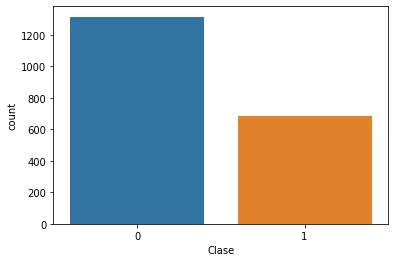

In [18]:
# Utilizo la libreía Seaborn para graficar las clases.
sns.countplot(x="Clase", data = diabetes)

In [19]:
# Chequeo el tipo de datos del dataset y veo que todos son numéricos.
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Clase                         int64
dtype: object

In [20]:
# Con este comando se puede ver un análisis estadístico rápido de las variables.
round(diabetes.describe(), 2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Clase
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,3.70,121.18,69.15,20.94,80.25,32.19,0.47,33.09,0.34
std,3.31,32.07,19.19,16.10,111.18,8.15,0.32,11.79,0.47
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,63.50,0.00,0.00,27.38,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,40.00,32.30,0.38,29.00,0.00
75%,6.00,141.00,80.00,32.00,130.00,36.80,0.62,40.00,1.00
max,17.00,199.00,122.00,110.00,744.00,80.60,2.42,81.00,1.00



Puedo observar que hay valores nulos en las columnas:
*   Pregnancies
*   Glucose
*   BloodPressure
*   SkinThickness
*   Insulin
*   BMI






In [21]:
# Elimino la columna de Pregnancies y la de Clase asi no obtengo la mediana de las mismas.
diabetes_1 = diabetes.drop(["Pregnancies", "Clase"],axis = 1)
diabetes_1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,138,62,35,0,33.6,0.127,47
1,84,82,31,125,38.2,0.233,23
2,145,0,0,0,44.2,0.630,31
3,135,68,42,250,42.3,0.365,24
4,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...
1995,75,64,24,55,29.7,0.370,33
1996,179,72,42,130,32.7,0.719,36
1997,85,78,0,0,31.2,0.382,42
1998,129,110,46,130,67.1,0.319,26


In [22]:
# Obtengo la mediana del resto de las columnas.
medians = round(diabetes_1.median(), 2)
print("Median",medians)

Median Glucose                     117.00
BloodPressure                72.00
SkinThickness                23.00
Insulin                      40.00
BMI                          32.30
DiabetesPedigreeFunction      0.38
Age                          29.00
dtype: float64


In [23]:
# Reemplazo los valores nulos con la mediana de cada columna y recupero las columnas aliminadas.
diabetes_sin_nulos = diabetes_1.replace(0, medians)

diabetes_sin_nulos["Pregnancies"] = diabetes["Pregnancies"]
diabetes_sin_nulos["Clase"] = diabetes["Clase"]

diabetes_sin_nulos

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Clase
0,138,62,35,40,33.6,0.127,47,2,1
1,84,82,31,125,38.2,0.233,23,0,0
2,145,72,23,40,44.2,0.630,31,0,1
3,135,68,42,250,42.3,0.365,24,0,1
4,139,62,41,480,40.7,0.536,21,1,0
...,...,...,...,...,...,...,...,...,...
1995,75,64,24,55,29.7,0.370,33,2,0
1996,179,72,42,130,32.7,0.719,36,8,1
1997,85,78,23,40,31.2,0.382,42,6,0
1998,129,110,46,130,67.1,0.319,26,0,1


Matriz de correlación.

In [24]:
round(diabetes_sin_nulos.corr(), 4)
# No se observa una fuerte correlación negativa.
# Entre las correlaciones positivas se puede destacar la correlación entre:
#  - Edad y Embarazos.
#  - Índice de Masa Corporal (IBM) y el Grosor de la piel.
#  - Clase con la Glucosa.

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Clase
Glucose,1.0000,0.1998,0.1852,0.3532,0.2329,0.1243,0.2601,0.1217,0.4877
BloodPressure,0.1998,1.0000,0.1652,-0.0211,0.2593,0.0125,0.3237,0.1981,0.1742
SkinThickness,0.1852,0.1652,1.0000,0.2559,0.5268,0.1335,0.0593,0.0424,0.1814
Insulin,0.3532,-0.0211,0.2559,1.0000,0.2176,0.1815,-0.0527,-0.0525,0.1452
BMI,0.2329,0.2593,0.5268,0.2176,1.0000,0.1420,0.0187,0.0114,0.2825
DiabetesPedigreeFunction,0.1243,0.0125,0.1335,0.1815,0.1420,1.0000,0.0266,-0.0255,0.1555
Age,0.2601,0.3237,0.0593,-0.0527,0.0187,0.0266,1.0000,0.5395,0.2365
Pregnancies,0.1217,0.1981,0.0424,-0.0525,0.0114,-0.0255,0.5395,1.0000,0.2244
Clase,0.4877,0.1742,0.1814,0.1452,0.2825,0.1555,0.2365,0.2244,1.0000


Histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2dc1052190>,
      dtype=object)

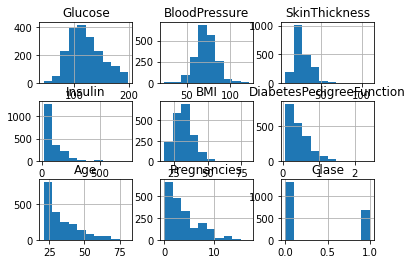

In [25]:
diabetes_sin_nulos.hist()